In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_df = pd.read_csv('downloads/Live.csv', header=None)

### Data Set Information:

The variability of consumer engagement is analysed through a Principal Component Analysis, highlighting the changes induced by the use of Facebook Live. The seasonal component is analysed through a study of the averages of the different engagement metrics for different time-frames (hourly, daily and monthly). Finally, we identify statistical outlier posts, that are qualitatively analyzed further, in terms of their selling approach and activities.

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7051 entries, 0 to 7050
Data columns (total 16 columns):
0     7051 non-null object
1     7051 non-null object
2     7051 non-null object
3     7051 non-null object
4     7051 non-null object
5     7051 non-null object
6     7051 non-null object
7     7051 non-null object
8     7051 non-null object
9     7051 non-null object
10    7051 non-null object
11    7051 non-null object
12    1 non-null object
13    1 non-null object
14    1 non-null object
15    1 non-null object
dtypes: object(16)
memory usage: 881.5+ KB


In [4]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
data_df = data_df.drop([0])

In [6]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [7]:
data_df.isnull().sum()*100/data_df.isnull().count()

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12    100.0
13    100.0
14    100.0
15    100.0
dtype: float64

In [8]:
data_df_clean = data_df.drop(columns=[0,1,2,12,13,14,15])

In [9]:
data_df_clean=data_df_clean.rename(columns={x:y for x,y in zip(data_df_clean.columns,range(0,len(data_df_clean.columns)))})

In [10]:
data_df_clean.head()

,0,1,2,3,4,5,6,7,8
1,529,512,262,432,92,3,1,1,0
2,150,0,0,150,0,0,0,0,0
3,227,236,57,204,21,1,1,0,0
4,111,0,0,111,0,0,0,0,0
5,213,0,0,204,9,0,0,0,0


In [11]:
# Define the features and the outcome.
X = data_df_clean.iloc[:, :8]
y = data_df_clean.iloc[:, 8]

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

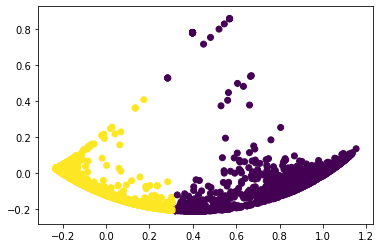

In [13]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=50).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()


In [14]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Comparing k-means clusters against the data:
8         0    1  10  12  19   2   3  31  4  5  6  7  8  9
row_0                                                     
0       930  232   0   0   0  63  28   0  8  8  1  0  1  0
1      5697   44   1   1   2   8   7   1  9  1  3  2  2  1


### MiniBatch

In [15]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Predict new MiniBatch cluster memberships.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0     0     1
row_0            
0         0  5777
1      1271     2


In [16]:
from sklearn.model_selection import train_test_split

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.9, random_state=42)

### Mean-Shift

In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.9, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


In [20]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)


/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


In [ ]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, full_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

#### Relevant Papers:

Nassim Dehouche and Apiradee Wongkitrungrueng. Facebook Live as a Direct Selling Channel, 2018, Proceedings of ANZMAC 2018: The 20th Conference of the Australian and New Zealand Marketing Academy. Adelaide (Australia), 3-5 December 2018.


#### Citation Request:

Nassim Dehouche and Apiradee Wongkitrungrueng. Facebook Live as a Direct Selling Channel, 2018, Proceedings of ANZMAC 2018: The 20th Conference of the Australian and New Zealand Marketing Academy. Adelaide (Australia), 3-5 December 2018.

### Your end-user and the value your project provides to them.
This will give same value of what is the generic comments they get in facebook


### Quantifiable results based on the research you’ve conducted.


### The visuals you chose and what they represent for your research.


### Next steps you'd take to expand on your work.


### A specified research question your model addresses.


### How you chose your model specification and what alternatives you compared it to.


### The practical uses of your model for an audience of interest.


### Any weak points or shortcomings of your model.